# SNR su low-pass a diverse frequenze del lock-in

[FOGLIO DI LAVORO EXCEL](https://unimibit-my.sharepoint.com/personal/g_fracasso2_campus_unimib_it/_layouts/15/guestaccess.aspx?share=Eb67kDSYpslCpRUZ2Tgg-tYBs5W_hCoCteq2ypSsnMiRcw&e=RWR5ri) 

---

**Shock**: tutti questi dati sono mezzi fails.

#### Riporto commento dal foglio Excel

ora passiamo alle misure LOCK-IN, per cui occorre utilizzare il chopper (vedere schema nella scheda 1.5 in schede_parte_01.pdf)									
OCCHIO: QUESTE SONO CACATE, LE FREQUENZE CHOPPER SONO SBAGLIATE,  SNR SU LOW-PASS INVECE SI SALVA									

---

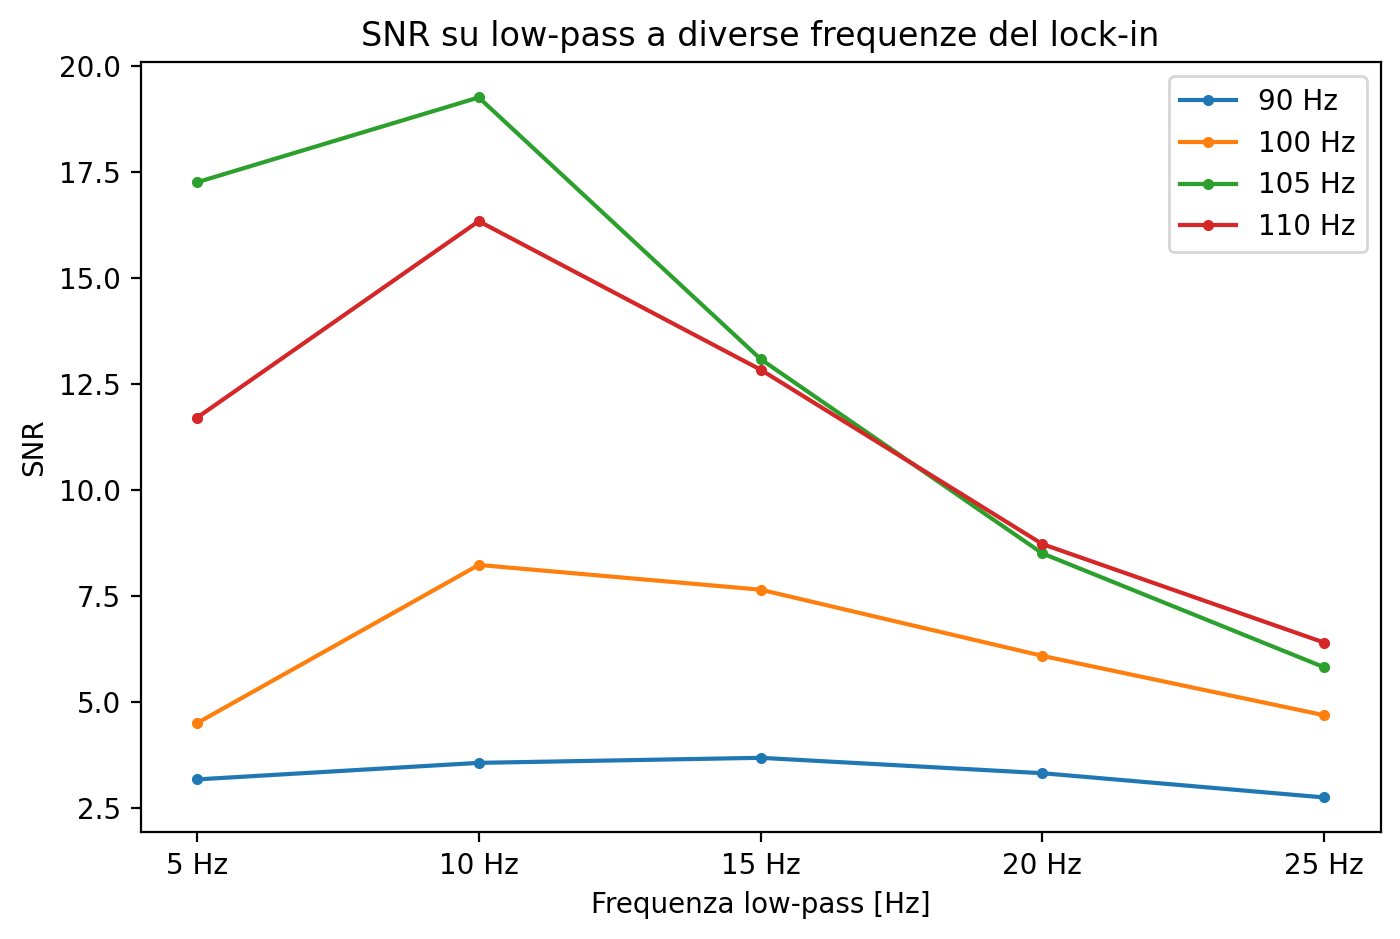

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Legge il file ignorando la prima riga (intestazione)
dati = np.loadtxt("data/snr_lock_in_BRUTTE.csv", skiprows=1)

x = dati[:, 0] # Prima colonna: frequenza low-pass filter
# le successive colonne sono i valori SNR a frequenza chopper fissa
y = [dati[:,i] for i in range(1, 5)] # dalla seconda alla quinta: SNR 
# le frequenze del chopper vengono messe ad etichetta
low_pass = ['5 Hz', '10 Hz', '15 Hz', '20 Hz', '25 Hz']
lock_in = ['90 Hz', '100 Hz', '105 Hz', '110 Hz']

# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(4):
    plt.plot(x, y[i], marker='o', label=lock_in[i], linestyle='-', markersize=3)
plt.xlabel("Frequenza low-pass [Hz]")
plt.xticks(x, low_pass)
plt.ylabel("SNR")
plt.title("SNR su low-pass a diverse frequenze del lock-in")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

A 10 Hz di low pass stiamo tagliando la maggior parte del rumore, senza tagliare troppo segnale. 

- sotto tagli troppo segnale
- sopra tagli poco rumore

# SNR su frequenze del lock-in a diverse freq. low-pass 

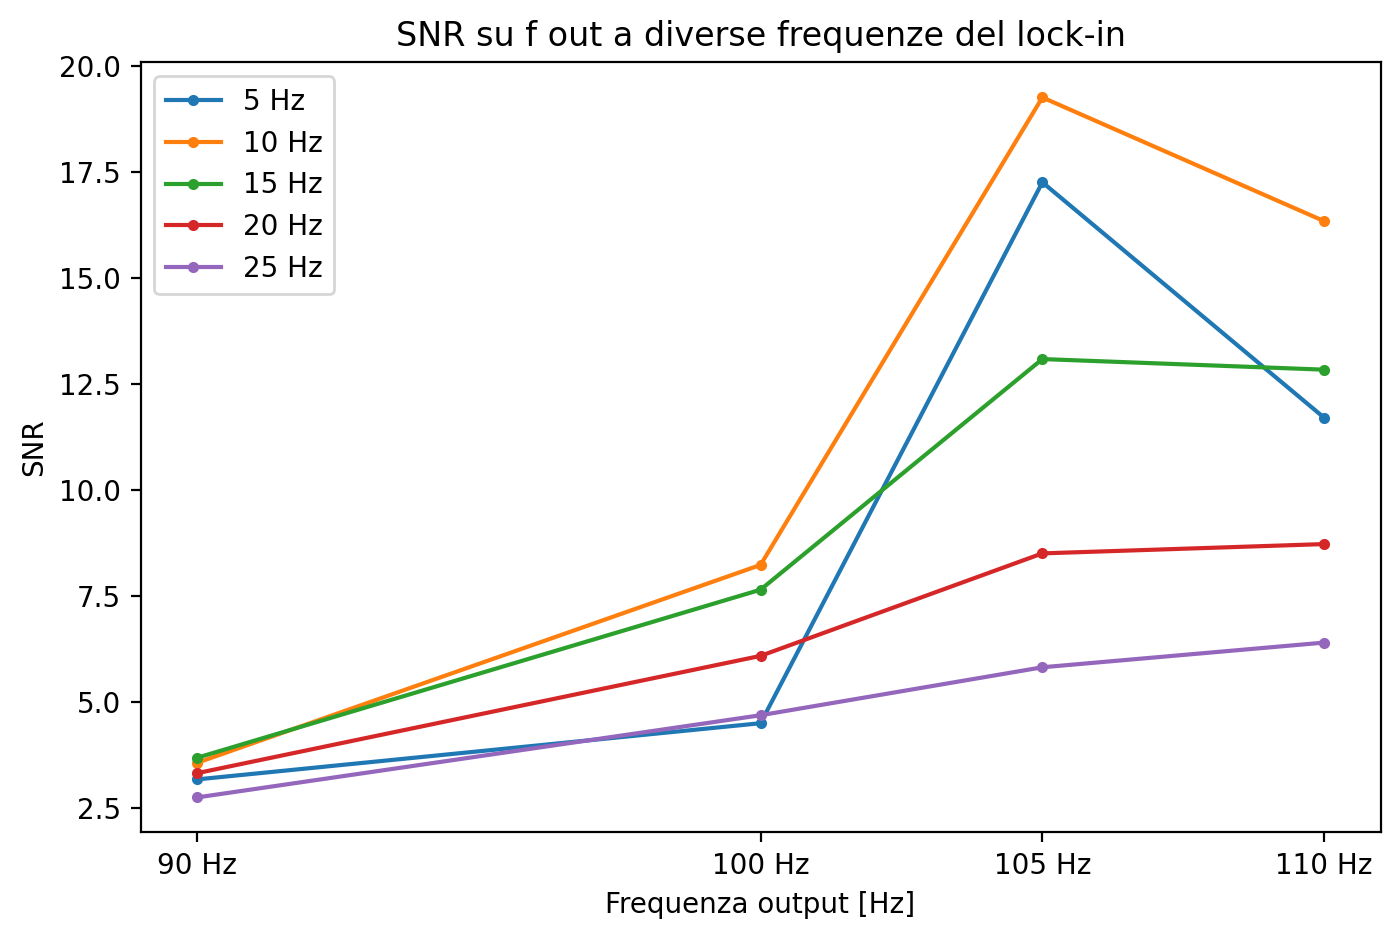

In [2]:
x2 = np.array([90, 100, 105, 110])
y2 = []
for j in range(len(y[0])):
    help = []
    for i in range(4):
        help.append(y[i][j])
    y2.append(help)

# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(len(y[0])):
    plt.plot(x2, y2[i], marker='o', label=low_pass[i], linestyle='-', markersize=3)
plt.xlabel("Frequenza output [Hz]")
plt.xticks(x2, lock_in)
plt.ylabel("SNR")
plt.title("SNR su f out a diverse frequenze del lock-in")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

25 marzo
L'obiettivo ora è misurare più frequenze di output, mantenendo il low-pass attorno all'ottimo che abbiamo osservato (10 Hz). In questo modo possiamo estrapolare il **tempo di rilassamento** del sistema.

Tempo di rilassamento: il chopper è come se mettesse il segnale su On/OFF periodicamente. QUando il segnale va OFF il sistema rilassa, quando torna ON viene nuovamente eccitato. Se torna ON troppo in fretta il sistema non fa in tempo a rilassarsi e quindi non c'è niente da eccitare, risultato: il segnale diminuisce.

In [3]:
y2

[[np.float64(3.175), np.float64(4.5), np.float64(17.25), np.float64(11.7)],
 [np.float64(3.565217391),
  np.float64(8.230769231),
  np.float64(19.25),
  np.float64(16.33333333)],
 [np.float64(3.684210526),
  np.float64(7.647058824),
  np.float64(13.08333333),
  np.float64(12.83333333)],
 [np.float64(3.321428571),
  np.float64(6.086956522),
  np.float64(8.502673797),
  np.float64(8.722222222)],
 [np.float64(2.75),
  np.float64(4.6875),
  np.float64(5.818181818),
  np.float64(6.4)]]

Blades interne: 20Hz-1kHz
Blades esterne: 